In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns
from pylab import rcParams
from collections import Counter
import tensorflow as tf
from tensorflow.keras import Model ,models, layers, optimizers, regularizers
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from keras.layers import Input



In [4]:
raw_train = pd.read_csv('/content/drive/MyDrive/번천/dataset/train_data.csv')
raw_test = pd.read_csv('/content/drive/MyDrive/번천/dataset/test_data.csv')

In [ ]:
raw_test['type'].value_counts()

0    1296
1    1107
2    1098
3     918
4     918
5     747
6     747
7     558
Name: type, dtype: int64

In [ ]:
raw_data.head(20)

In [ ]:
raw_test.head(20)

In [ ]:
fig, ax = plt.subplots(figsize=(8,10), constrained_layout=True);
ax.set_title('check');
parallel_coordinates(frame = raw_test, class_column = 'type', colormap = plt.get_cmap('Set1'));

In [ ]:
for_view['type'].isin([1])

0       False
1       False
2       False
3       False
4       False
        ...  
7384    False
7385    False
7386    False
7387    False
7388    False
Name: type, Length: 7389, dtype: bool

In [ ]:
for_view['type'].isin([4])

0       False
1       False
2       False
3       False
4       False
        ...  
7384    False
7385    False
7386    False
7387    False
7388    False
Name: type, Length: 7389, dtype: bool

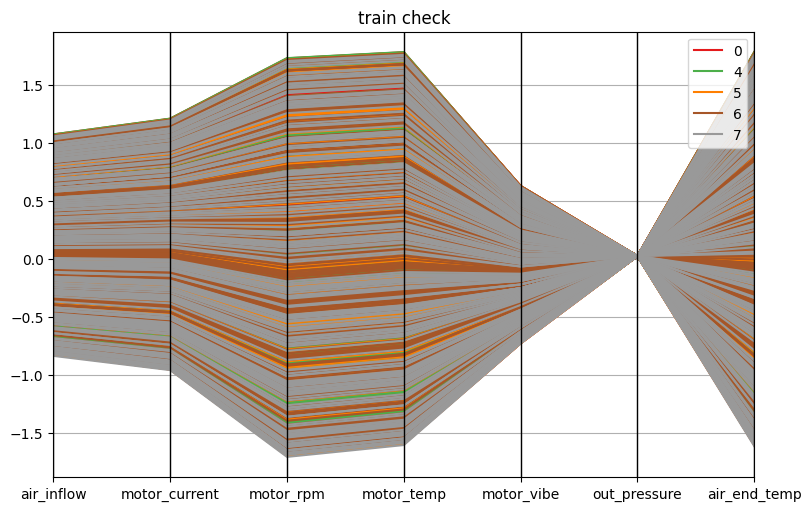

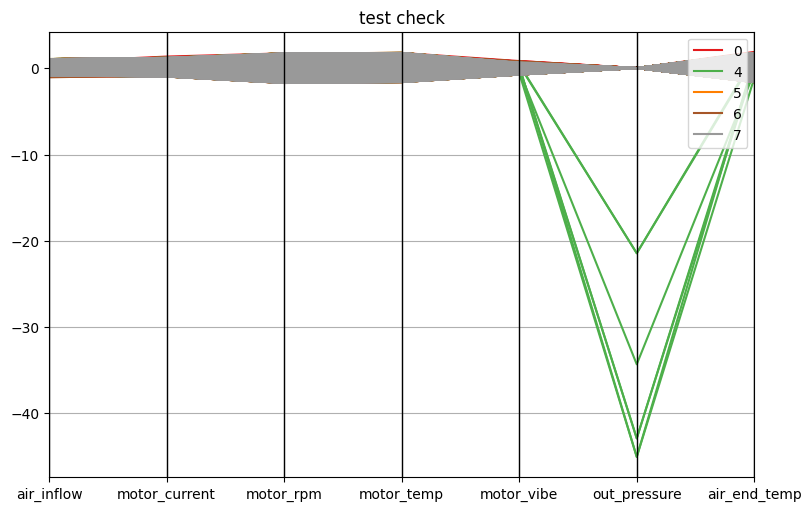

In [10]:
scaler = StandardScaler()

test = raw_test[['air_inflow', 'motor_current','motor_rpm', 'motor_temp', 'motor_vibe', 'out_pressure', 'air_end_temp', 'type']].copy()
train = raw_train[['air_inflow', 'motor_current','motor_rpm', 'motor_temp', 'motor_vibe', 'out_pressure', 'air_end_temp', 'type']].copy()
full = pd.concat([test, train], ignore_index= True)

scaler.fit(full.drop(['type'], axis = 1))

train = scaler.transform(train.drop(['type'], axis = 1))
train = pd.DataFrame(train)

test = scaler.transform(test.drop(['type'], axis = 1))
test = pd.DataFrame(test)

train.columns = ['air_inflow', 'motor_current','motor_rpm', 'motor_temp', 'motor_vibe', 'out_pressure', 'air_end_temp']
for_view = train.copy()
for_view['type'] = raw_train['type']

test.columns = ['air_inflow', 'motor_current','motor_rpm', 'motor_temp', 'motor_vibe', 'out_pressure', 'air_end_temp']
for_view2 = test.copy()
for_view2['type'] = raw_test['type']


fig, ax = plt.subplots(figsize=(8,5), constrained_layout=True);
ax.set_title('train check');
parallel_coordinates(frame = for_view[for_view['type'].isin([0,4,5,6,7])], class_column = 'type', colormap = plt.get_cmap('Set1'));

fig, ax = plt.subplots(figsize=(8,5), constrained_layout=True);
ax.set_title('test check');
parallel_coordinates(frame = for_view2[for_view2['type'].isin([0,4,5,6,7])], class_column = 'type', colormap = plt.get_cmap('Set1'));

# standard lstm ae

In [ ]:
# 시계열 순서에 맞게 데이터 프레임 변경

data = raw_data[['air_inflow', 'motor_current','motor_rpm', 'motor_temp', 'motor_vibe', 'out_pressure', 'air_end_temp', 'type']].copy()
data

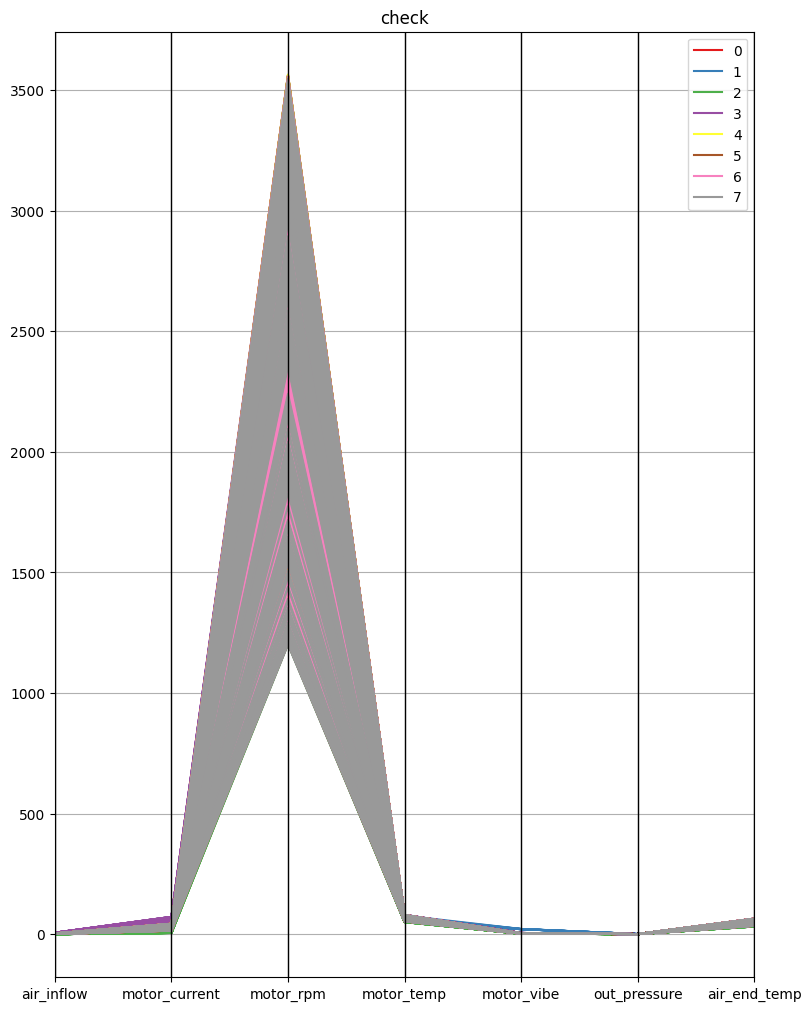

In [ ]:
fig, ax = plt.subplots(figsize=(8,10), constrained_layout=True);
ax.set_title('check');
parallel_coordinates(frame = data, class_column = 'type', colormap = plt.get_cmap('Set1'));


In [ ]:
scaler = StandardScaler()

train = data.drop(['type'], axis = 1)
train = scaler.fit_transform(train)
train

array([[-4.48257396e-01, -5.11748204e-01, -1.00704610e+00, ...,
        -3.31821181e-01, -1.11022302e-16, -9.17212397e-01],
       [ 6.99749260e-01,  8.02045130e-01,  1.11878471e+00, ...,
         1.88461694e-01, -1.11022302e-16,  1.17832015e+00],
       [-1.82052954e-01, -2.02966335e-01, -5.08304669e-01, ...,
        -2.11267832e-01, -1.11022302e-16, -4.25427133e-01],
       ...,
       [-7.81012949e-01, -8.89638397e-01, -1.61920394e+00, ...,
        -4.77754182e-01, -1.11022302e-16, -1.52019386e+00],
       [-7.64375171e-01, -8.71258524e-01, -1.58866875e+00, ...,
        -4.71409269e-01, -1.11022302e-16, -1.49038870e+00],
       [ 4.91777040e-01,  5.66047559e-01,  7.36367815e-01, ...,
         9.32879978e-02, -1.11022302e-16,  8.01170144e-01]])

In [ ]:
train = pd.DataFrame(train)
train.columns = ['air_inflow', 'motor_current','motor_rpm', 'motor_temp', 'motor_vibe', 'out_pressure', 'air_end_temp']
train

,air_inflow,motor_current,motor_rpm,motor_temp,motor_vibe,out_pressure,air_end_temp
0,-0.448257,-0.511748,-1.007046,-0.910351,-0.331821,-1.110223e-16,-0.917212
1,0.699749,0.802045,1.118785,1.172883,0.188462,-1.110223e-16,1.178320
2,-0.182053,-0.202966,-0.508305,-0.421612,-0.211268,-1.110223e-16,-0.425427
3,0.200616,0.230799,0.194005,0.265958,-0.039955,-1.110223e-16,0.266970
4,-0.190372,-0.208848,-0.517029,-0.430592,-0.211268,-1.110223e-16,-0.434598
...,...,...,...,...,...,...,...
2458,0.125746,0.149927,0.063140,0.137680,-0.071680,-1.110223e-16,0.137432
2459,-0.073907,-0.084600,-0.316369,-0.234326,-0.160509,-1.110223e-16,-0.236279
2460,-0.781013,-0.889638,-1.619204,-1.510693,-0.477754,-1.110223e-16,-1.520194
2461,-0.764375,-0.871259,-1.588669,-1.481189,-0.471409,-1.110223e-16,-1.490389


In [ ]:
for_view = train.copy()
for_view['type'] = data['type']

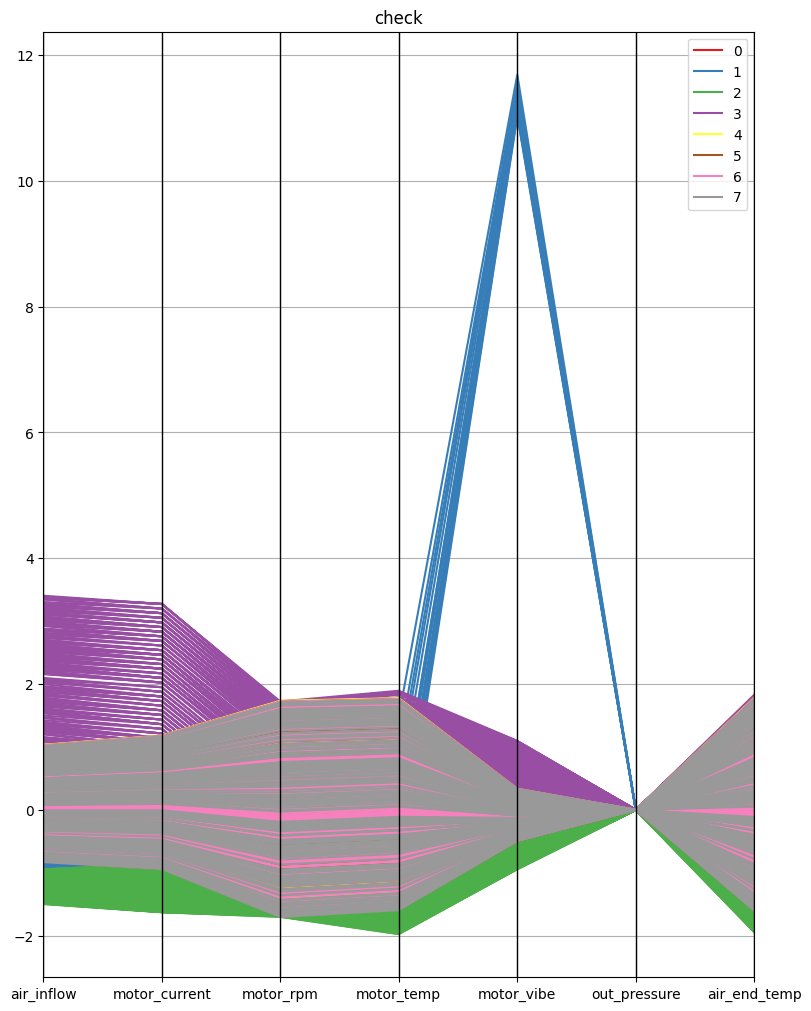

In [ ]:
for_view = train.copy()
for_view['type'] = data['type']

fig, ax = plt.subplots(figsize=(8,10), constrained_layout=True);
ax.set_title('check');
parallel_coordinates(frame = for_view, class_column = 'type', colormap = plt.get_cmap('Set1'));

In [ ]:
train = train[data['type'].isin([0,4,5,6,7])]
train

,air_inflow,motor_current,motor_rpm,motor_temp,motor_vibe,out_pressure,air_end_temp
0,-0.448257,-0.511748,-1.007046,-0.910351,-0.331821,-1.110223e-16,-0.917212
1,0.699749,0.802045,1.118785,1.172883,0.188462,-1.110223e-16,1.178320
2,-0.182053,-0.202966,-0.508305,-0.421612,-0.211268,-1.110223e-16,-0.425427
3,0.200616,0.230799,0.194005,0.265958,-0.039955,-1.110223e-16,0.266970
4,-0.190372,-0.208848,-0.517029,-0.430592,-0.211268,-1.110223e-16,-0.434598
...,...,...,...,...,...,...,...
2458,0.125746,0.149927,0.063140,0.137680,-0.071680,-1.110223e-16,0.137432
2459,-0.073907,-0.084600,-0.316369,-0.234326,-0.160509,-1.110223e-16,-0.236279
2460,-0.781013,-0.889638,-1.619204,-1.510693,-0.477754,-1.110223e-16,-1.520194
2461,-0.764375,-0.871259,-1.588669,-1.481189,-0.471409,-1.110223e-16,-1.490389


In [ ]:
def temporalize(X, lookback):
    '''
    Inputs
    X         A 2D numpy array ordered by time of shape: 
              (n_observations x n_features)
    y         A 1D numpy array with indexes aligned with 
              X, i.e. y[i] should correspond to X[i]. 
              Shape: n_observations.
    lookback  The window size to look back in the past 
              records. Shape: a scalar.

    Output
    output_X  A 3D numpy array of shape: 
              ((n_observations-lookback-1) x lookback x 
              n_features)
    output_y  A 1D array of shape: 
              (n_observations-lookback-1), aligned with X.
    '''
    output_X = []
    # output_y = []
    for i in range(len(X) - lookback +1):
        t = []
        for j in range(0, lookback):
            # Gather the past records upto the lookback period
            t.append(X[(i + j), :])
        output_X.append(t)
        # output_y.append(y[i + lookback + 1])
    return np.squeeze(np.array(output_X))

In [ ]:
shift_train = temporalize(train.values, lookback=3).reshape(1420, 21, 1)

In [ ]:
train = np.array(train).reshape(len(np.array(train)), 7 ,1)

In [ ]:
X_train, X_test = train_test_split(shift_train, test_size=0.2, random_state=123)

In [ ]:
lstm_ae = models.Sequential()
# Encoder
lstm_ae.add(layers.LSTM(128, activation='relu', input_shape=(21, 1), return_sequences=True))
lstm_ae.add(layers.LSTM(64, activation='relu', return_sequences=False))
lstm_ae.add(layers.RepeatVector(21))
# Decoder
lstm_ae.add(layers.LSTM(128, activation='relu', return_sequences=True))
lstm_ae.add(Dropout(0.01))
lstm_ae.add(layers.LSTM(64, activation='relu', return_sequences=True))
lstm_ae.add(layers.TimeDistributed(layers.Dense(1)))

lstm_ae.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 21, 128)           66560     
                                                                 
 lstm_41 (LSTM)              (None, 64)                49408     
                                                                 
 repeat_vector_10 (RepeatVec  (None, 21, 64)           0         
 tor)                                                            
                                                                 
 lstm_42 (LSTM)              (None, 21, 128)           98816     
                                                                 
 dropout_5 (Dropout)         (None, 21, 128)           0         
                                                                 
 lstm_43 (LSTM)              (None, 21, 64)            49408     
                                                     

In [ ]:
lstm_ae.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
history = lstm_ae.fit(X_train, X_train,
                     epochs=150, batch_size=32,
                     validation_data=(X_test, X_test))

Epoch 1/150
36/36 [==============================] - 9s 115ms/step - loss: 0.4401 - val_loss: 0.4081
Epoch 2/150
36/36 [==============================] - 3s 79ms/step - loss: 0.3884 - val_loss: 0.3785
Epoch 3/150
36/36 [==============================] - 3s 79ms/step - loss: 0.3381 - val_loss: 0.3167
Epoch 4/150
36/36 [==============================] - 3s 87ms/step - loss: 0.3015 - val_loss: 0.3058
Epoch 5/150
36/36 [==============================] - 5s 129ms/step - loss: 0.2766 - val_loss: 0.2696
Epoch 6/150
36/36 [==============================] - 3s 80ms/step - loss: 0.2268 - val_loss: 0.1892
Epoch 7/150
36/36 [==============================] - 3s 81ms/step - loss: 0.1781 - val_loss: 0.1643
Epoch 8/150
36/36 [==============================] - 3s 90ms/step - loss: 0.1531 - val_loss: 0.1439
Epoch 9/150
36/36 [==============================] - 4s 100ms/step - loss: 0.1342 - val_loss: 0.1351
Epoch 10/150
36/36 [==============================] - 3s 82ms/step - loss: 0.1223 - val_loss: 0.1

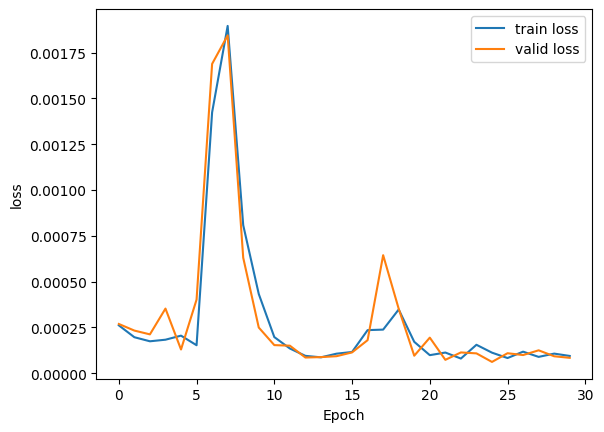

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.legend()
plt.xlabel('Epoch'); plt.ylabel('loss')
plt.show()

In [ ]:
def flatten(X):
    flattened_X = np.empty((X.shape[0], X.shape[2]))  # sample x features array.
    for i in range(X.shape[0]):
        flattened_X[i] = X[i, (X.shape[1]-1), :]
    return(flattened_X)

In [ ]:
pred_train = lstm_ae.predict(shift_train)

45/45 [==============================] - 1s 26ms/step


In [ ]:
mse = np.mean(np.square(flatten(shift_train) - flatten(pred_train)), axis=1)

In [ ]:
thres = np.max(mse)

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/번천/dataset/test_data.csv')

In [ ]:
test_df = test_df[['air_inflow', 'motor_current','motor_rpm', 'motor_temp', 'motor_vibe', 'out_pressure', 'air_end_temp', 'type']].copy()

In [ ]:
scale_test = scaler.transform(test_df.drop(['type'], axis= 1)[test_df['type'].isin([0,4,5,6,7])])

In [ ]:
shift_test = temporalize(scale_test, 3)
shift_test = shift_test.reshape(-1, 21, 1)

In [ ]:
test = scaler.transform(test_df.drop(['type'], axis= 1)[test_df['type'].isin([0,4,5,6,7])]).reshape(4266, 7, 1)

In [ ]:
valid_x_predictions = lstm_ae.predict(shift_test)

134/134 [==============================] - 7s 51ms/step


In [ ]:
mse = np.mean(np.square(flatten(shift_test) - flatten(valid_x_predictions)), axis=1)

In [ ]:
anom = mse > thres

In [ ]:
np.sum(anom)

302

In [ ]:
anom.shape

(4264,)

(0.0, 0.005)

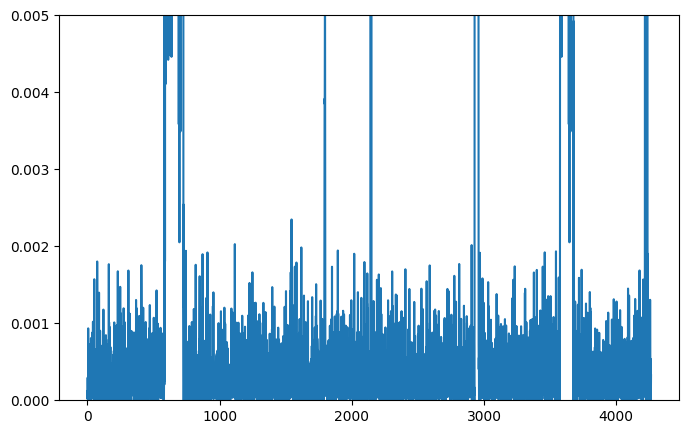

In [ ]:
plt.figure(figsize = (8,5))
plt.plot(mse)
plt.ylim(0, 0.005)
# plt.xlim(500,1000)

# 오토인코더

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/번천/dataset/train_data.csv')
data

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0
...,...,...,...,...,...,...,...,...
2458,2.28,50.20,0.7,29.53,2416.0,66.84,3.34,7
2459,2.04,46.94,0.7,26.34,2155.0,63.94,3.20,7
2460,1.19,35.74,0.7,15.39,1259.0,53.99,2.70,7
2461,1.21,36.00,0.7,15.64,1280.0,54.22,2.71,7


In [ ]:
# 시계열 순서에 맞게 데이터 프레임 변경

data = data[['air_inflow', 'motor_current','motor_rpm', 'motor_temp', 'motor_vibe', 'out_pressure', 'air_end_temp', 'type']]
data

In [ ]:
scaler = StandardScaler()

train = data.drop(['type'], axis = 1)
train = scaler.fit_transform(train)
train = pd.DataFrame(train)
train.columns = ['air_inflow', 'motor_current','motor_rpm', 'motor_temp', 'motor_vibe', 'out_pressure', 'air_end_temp']
train

,air_inflow,motor_current,motor_rpm,motor_temp,motor_vibe,out_pressure,air_end_temp
0,-0.448257,-0.511748,-1.007046,-0.910351,-0.331821,-1.110223e-16,-0.917212
1,0.699749,0.802045,1.118785,1.172883,0.188462,-1.110223e-16,1.178320
2,-0.182053,-0.202966,-0.508305,-0.421612,-0.211268,-1.110223e-16,-0.425427
3,0.200616,0.230799,0.194005,0.265958,-0.039955,-1.110223e-16,0.266970
4,-0.190372,-0.208848,-0.517029,-0.430592,-0.211268,-1.110223e-16,-0.434598
...,...,...,...,...,...,...,...
2458,0.125746,0.149927,0.063140,0.137680,-0.071680,-1.110223e-16,0.137432
2459,-0.073907,-0.084600,-0.316369,-0.234326,-0.160509,-1.110223e-16,-0.236279
2460,-0.781013,-0.889638,-1.619204,-1.510693,-0.477754,-1.110223e-16,-1.520194
2461,-0.764375,-0.871259,-1.588669,-1.481189,-0.471409,-1.110223e-16,-1.490389


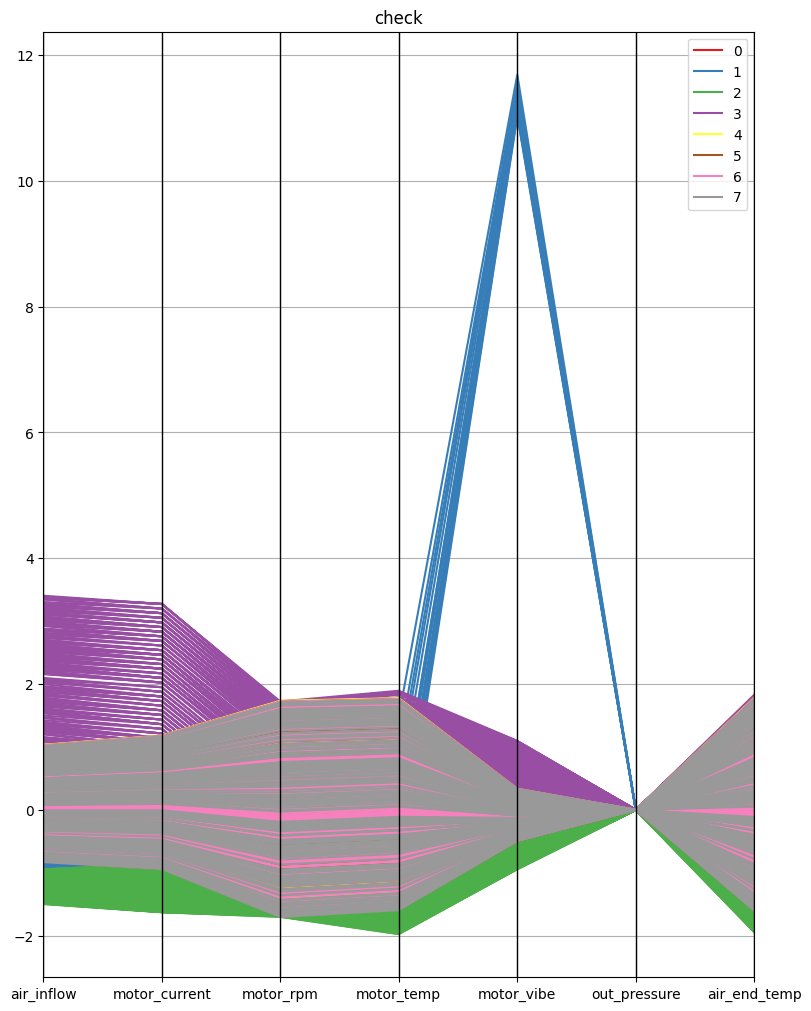

In [ ]:
for_view = train.copy()
for_view['type'] = data['type']

fig, ax = plt.subplots(figsize=(8,10), constrained_layout=True);
ax.set_title('check');
parallel_coordinates(frame = for_view, class_column = 'type', colormap = plt.get_cmap('Set1'));

In [ ]:
train_use = train.drop(['motor_vibe'], axis = 1)

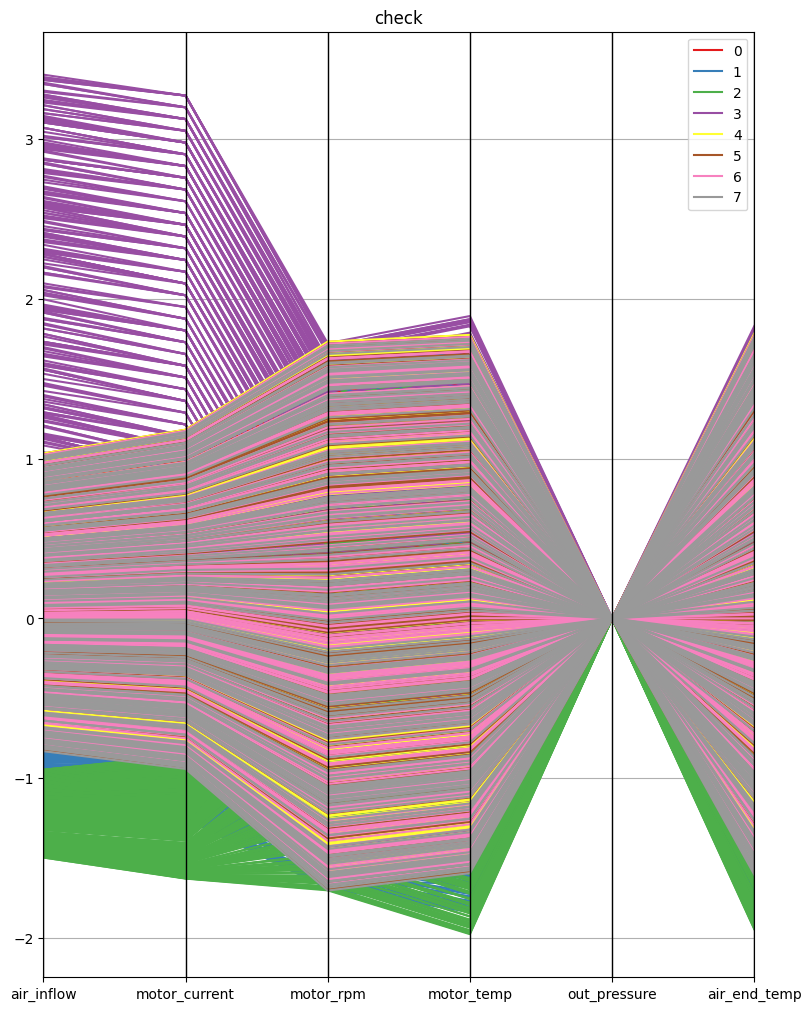

In [ ]:
for_view = train_use.copy()
for_view['type'] = data['type']

fig, ax = plt.subplots(figsize=(8,10), constrained_layout=True);
ax.set_title('check');
parallel_coordinates(frame = for_view, class_column = 'type', colormap = plt.get_cmap('Set1'));

In [ ]:
arr_train = np.array(train_use).reshape(len(np.array(train_use)), 6 ,1)

In [ ]:
X_train, X_test = train_test_split(train_use, test_size=0.2, random_state=123)

In [ ]:
input_dim = X_train.shape[1]
encoding_dim = 6

input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [ ]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_46 (Dense)            (None, 6)                 42        
                                                                 
 dense_47 (Dense)            (None, 3)                 21        
                                                                 
 dense_48 (Dense)            (None, 3)                 12        
                                                                 
 dense_49 (Dense)            (None, 6)                 24        
                                                                 
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(loss ='mse', optimizer = Adam(learning_rate= 0.001), metrics=['accuracy'])
history = autoencoder.fit(X_train, X_train, batch_size = 32, epochs = 500,
                         validation_data=(X_test, X_test))

In [ ]:
predict = autoencoder.predict(train_use)

mse = np.mean(np.square(predict - train_use), axis=1)

77/77 [==============================] - 0s 2ms/step


In [ ]:
thres = np.mean(mse)+ 5*np.std(mse)
thres

3.0847170915499964

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/번천/dataset/test_data.csv')

#...

In [ ]:
data = data[data['type'].isin([2])]

In [ ]:
scaler = StandardScaler()

a = scaler.fit_transform(data)

# train_scale = pd.DataFrame(scaler.fit_transform(np.array(train['value']).reshape(-1, 1)), columns = ['value'])
# train_scale_df = train[['date']].reset_index(drop = True).join(train_scale)

# test_scale = pd.DataFrame(scaler.transform(np.array(test['value']).reshape(-1, 1)), columns = ['value'])
# test_scale_df = test[['date']].reset_index(drop = True).join(test_scale)

In [ ]:
data

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
1167,4.73,54.30,0.7,55.0,2704.0,71.04,4.70,3
1168,5.65,60.83,0.7,65.0,3226.0,76.84,4.99,3
1169,2.45,37.99,0.7,28.0,1399.0,56.54,3.98,3
1170,5.86,62.33,0.7,68.0,3346.0,78.18,5.06,3
1171,4.43,52.15,0.7,51.0,2532.0,69.13,4.61,3
...,...,...,...,...,...,...,...,...
1468,4.77,54.56,0.7,55.0,2725.0,71.28,4.71,3
1469,5.51,59.86,0.7,64.0,3149.0,75.99,4.95,3
1470,3.11,42.70,0.7,36.0,1776.0,60.73,4.19,3
1471,5.46,59.51,0.7,63.0,3121.0,75.68,4.93,3


In [ ]:
data = pd.DataFrame(a).drop([7], axis=1)

In [ ]:
data.T.plot();

설비 번호 [0, 4, 5, 6, 7]: 30HP(마력)
설비 번호 1: 20HP
설비 번호 2: 10HP
설비 번호 3: 50HP

In [ ]:
data['type'].value_counts()

0    432
4    306
5    249
6    249
7    186
Name: type, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
scaler = StandardScaler()

a = scaler.fit_transform(data)

# train_scale = pd.DataFrame(scaler.fit_transform(np.array(train['value']).reshape(-1, 1)), columns = ['value'])
# train_scale_df = train[['date']].reset_index(drop = True).join(train_scale)

# test_scale = pd.DataFrame(scaler.transform(np.array(test['value']).reshape(-1, 1)), columns = ['value'])
# test_scale_df = test[['date']].reset_index(drop = True).join(test_scale)

In [ ]:
data = pd.DataFrame(a).drop([2, 7], axis=1)

In [ ]:
data.describe()

,0,1,3,4,5,6
count,1.422000e+03,1.422000e+03,1.422000e+03,1.422000e+03,1.422000e+03,1.422000e+03
mean,3.785064e-16,5.009276e-16,-1.623955e-17,-1.386608e-16,-1.284174e-15,6.021125e-16
std,1.000352e+00,1.000352e+00,1.000352e+00,1.000352e+00,1.000352e+00,1.000352e+00
min,-1.706586e+00,-1.700641e+00,-1.700058e+00,-1.700192e+00,-1.700774e+00,-1.693405e+00
25%,-8.640069e-01,-8.601355e-01,-8.597098e-01,-8.597664e-01,-8.597319e-01,-8.598641e-01
50%,-3.674768e-02,-3.236490e-02,-3.238532e-02,-3.236521e-02,-3.236557e-02,-2.632293e-02
75%,8.824292e-01,8.839714e-01,8.840356e-01,8.843967e-01,8.842169e-01,8.853627e-01
max,1.725008e+00,1.719267e+00,1.719352e+00,1.719395e+00,1.719398e+00,1.718904e+00


In [ ]:
timesteps = 6
n_features = 1

In [ ]:
from tensorflow.keras.layers import Input, Dense, GaussianNoise
from tensorflow.keras.models import Model

# 입력 데이터 크기
input_size = 6

# 노이즈 비율
noise_factor = 0.1

# 인코더 모델 정의
input_data = Input(shape=(input_size, ))
encoded = Dense(3, activation='relu')(input_data)

# 디코더 모델 정의
decoded = Dense(input_size, activation='sigmoid')(encoded)

# 오토인코더 모델 정의
autoencoder = Model(input_data, decoded)

# 가우시안 노이즈 레이어 추가
autoencoder_input = Input(shape=(input_size,))
noisy_input = GaussianNoise(stddev=noise_factor)(autoencoder_input)
autoencoder_output = autoencoder(noisy_input)
autoencoder = Model(autoencoder_input, autoencoder_output)

# 모델 컴파일
autoencoder.compile(optimizer='adam', loss='mse')


In [ ]:
# 모델 학습
autoencoder.fit(data, data, epochs=200, batch_size=32)

In [ ]:
lstm_ae = models.Sequential()
# Encoder
lstm_ae.add(layers.LSTM(32, activation='relu', input_shape=(timesteps, n_features), return_sequences=True))
lstm_ae.add(layers.LSTM(16, activation='relu', return_sequences=False))
lstm_ae.add(layers.RepeatVector(timesteps))
# Decoder
lstm_ae.add(layers.LSTM(16, activation='relu', return_sequences=True))
lstm_ae.add(layers.LSTM(32, activation='relu', return_sequences=True))
lstm_ae.add(layers.TimeDistributed(layers.Dense(n_features)))

lstm_ae.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 6, 32)             4352      
                                                                 
 lstm_19 (LSTM)              (None, 16)                3136      
                                                                 
 repeat_vector_4 (RepeatVect  (None, 6, 16)            0         
 or)                                                             
                                                                 
 lstm_20 (LSTM)              (None, 6, 16)             2112      
                                                                 
 lstm_21 (LSTM)              (None, 6, 32)             6272      
                                                                 
 time_distributed_4 (TimeDis  (None, 6, 1)             33        
 tributed)                                            

In [ ]:
df = data.iloc[:, :-1].copy()

In [ ]:
df

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12
...,...,...,...,...,...,...,...
2458,2.28,50.20,0.7,29.53,2416.0,66.84,3.34
2459,2.04,46.94,0.7,26.34,2155.0,63.94,3.20
2460,1.19,35.74,0.7,15.39,1259.0,53.99,2.70
2461,1.21,36.00,0.7,15.64,1280.0,54.22,2.71


In [ ]:
data = np.array(data).reshape(len(np.array(data)), 6 ,1)

In [ ]:
len(np.array(df))

1422

In [ ]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=123)

In [ ]:
X_train

In [ ]:
lstm_ae.compile(loss='mse', optimizer=optimizers.Adam())

In [ ]:
history = lstm_ae.fit(X_train, X_train,
                     epochs=90, batch_size=32,
                     validation_data=(X_test, X_test))

Epoch 1/90
36/36 [==============================] - 6s 27ms/step - loss: 0.2580 - val_loss: 0.1481
Epoch 2/90
36/36 [==============================] - 0s 12ms/step - loss: 0.1018 - val_loss: 0.0808
Epoch 3/90
36/36 [==============================] - 0s 13ms/step - loss: 0.0556 - val_loss: 0.0350
Epoch 4/90
36/36 [==============================] - 0s 14ms/step - loss: 0.0269 - val_loss: 0.0180
Epoch 5/90
36/36 [==============================] - 0s 13ms/step - loss: 0.0092 - val_loss: 0.0035
Epoch 6/90
36/36 [==============================] - 0s 14ms/step - loss: 0.0031 - val_loss: 0.0025
Epoch 7/90
36/36 [==============================] - 0s 12ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 8/90
36/36 [==============================] - 0s 13ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 9/90
36/36 [==============================] - 0s 12ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 10/90
36/36 [==============================] - 0s 13ms/step - loss: 6.9348e-04 - val_loss: 4.7232e-04
E

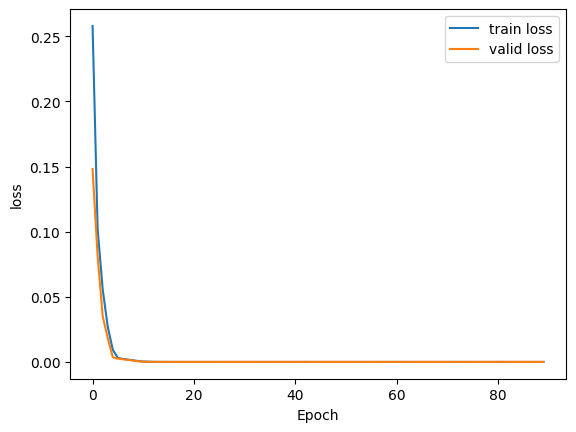

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.legend()
plt.xlabel('Epoch'); plt.ylabel('loss')
plt.show()

In [ ]:
valid_x_predictions = lstm_ae.predict(data)

45/45 [==============================] - 1s 2ms/step


In [ ]:
data.reshape(len(data),-1)

array([[1.590e+00, 4.100e+01, 7.000e-01, ..., 1.680e+03, 5.867e+01,
        2.930e+00],
       [2.970e+00, 5.928e+01, 7.000e-01, ..., 3.142e+03, 7.491e+01,
        3.750e+00],
       [1.910e+00, 4.529e+01, 7.000e-01, ..., 2.023e+03, 6.248e+01,
        3.120e+00],
       ...,
       [1.190e+00, 3.574e+01, 7.000e-01, ..., 1.259e+03, 5.399e+01,
        2.700e+00],
       [1.210e+00, 3.600e+01, 7.000e-01, ..., 1.280e+03, 5.422e+01,
        2.710e+00],
       [2.720e+00, 5.599e+01, 7.000e-01, ..., 2.879e+03, 7.199e+01,
        3.600e+00]])

In [ ]:
def flatten(X):
    flattened_X = np.empty((X.shape[0], X.shape[2]))  # sample x features array.
    for i in range(X.shape[0]):
        flattened_X[i] = X[i, (X.shape[1]-1), :]
    return(flattened_X)

In [ ]:
mse = np.mean(np.power(flatten(data) - flatten(valid_x_predictions), 2), axis=1)

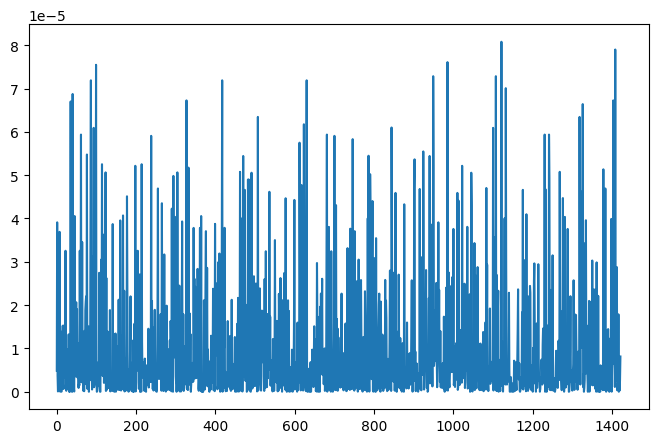

In [ ]:
plt.figure(figsize = (8,5))
plt.plot(mse)

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/번천/dataset/test_data.csv')

In [ ]:
test_df[test_df['type'].isin([0,4,5,6,7])]

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,2.51,53.28,0.7,32.54,2662.0,69.58,3.48,0
1,2.66,55.24,0.7,34.45,2819.0,71.32,3.57,0
2,1.72,42.74,0.7,22.23,1819.0,60.21,3.01,0
3,2.20,49.15,0.7,28.50,2332.0,65.91,3.30,0
4,2.06,47.28,0.7,26.67,2182.0,64.24,3.21,0
...,...,...,...,...,...,...,...,...
7384,2.12,48.08,0.7,27.45,2246.0,64.96,3.25,7
7385,1.48,39.63,0.7,19.19,1570.0,57.44,2.87,7
7386,1.56,40.61,0.7,20.15,1649.0,58.32,2.92,7
7387,1.59,40.99,0.7,20.52,1679.0,58.66,2.93,7


In [ ]:
b = scaler.transform(test_df[test_df['type'].isin([0,4,5,6,7])])

In [ ]:
b = pd.DataFrame(b)
test = b.drop([2,7], axis=1)

In [ ]:
b

,0,1,2,3,4,5,6,7
0,0.616071,0.618483,0.0,0.618421,0.618282,0.618431,0.618321,0.0
1,0.683036,0.684834,0.0,0.684557,0.684723,0.684692,0.687023,0.0
2,0.263393,0.261679,0.0,0.261427,0.261532,0.261615,0.259542,0.0
3,0.477679,0.478673,0.0,0.478532,0.478629,0.478675,0.480916,0.0
4,0.415179,0.415369,0.0,0.415166,0.415150,0.415080,0.412214,0.0
...,...,...,...,...,...,...,...,...
4261,0.441964,0.442451,0.0,0.442175,0.442234,0.442498,0.442748,1.0
4262,0.156250,0.156398,0.0,0.156163,0.156157,0.156131,0.152672,1.0
4263,0.191964,0.189573,0.0,0.189404,0.189590,0.189642,0.190840,1.0
4264,0.205357,0.202437,0.0,0.202216,0.202285,0.202589,0.198473,1.0


In [ ]:
data = np.array(test).reshape(len(np.array(test)), 6 ,1)

In [ ]:
test = np.array(test_df[test_df['type'].isin([0,4,5,6,7])].iloc[:,:-1]).reshape(len(test_df[test_df['type'].isin([0,4,5,6,7])]), 7, 1)

In [ ]:
valid_x_predictions = lstm_ae.predict(data)

134/134 [==============================] - 0s 3ms/step


In [ ]:
mse = np.mean(np.power(flatten(data) - flatten(valid_x_predictions), 2), axis=1)

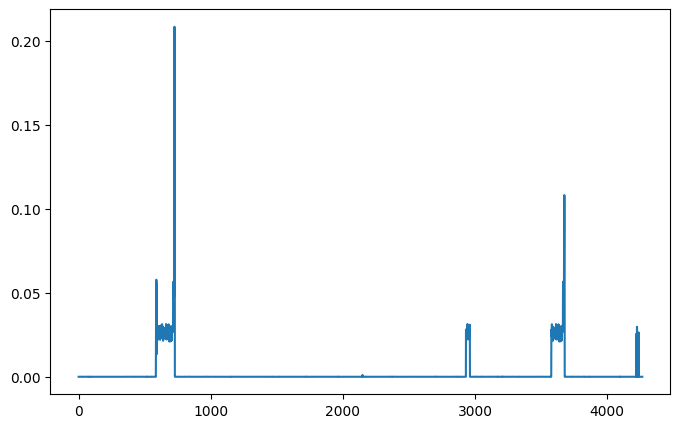

In [ ]:
plt.figure(figsize = (8,5))
plt.plot(mse)
# plt.ylim(0)
# plt.xlim(500,1000)

In [ ]:
data

array([[[6.7524000e+00],
        [1.6089012e+03],
        [9.5443520e+02],
        [6.2915070e+06],
        [1.8805108e+03],
        [7.2288000e+00]],

       [[7.0884000e+00],
        [1.6667996e+03],
        [1.0095960e+03],
        [6.6624980e+06],
        [1.9262032e+03],
        [7.3467000e+00]],

       [[4.9828000e+00],
        [1.2975496e+03],
        [6.5668240e+02],
        [4.2994980e+06],
        [1.6344546e+03],
        [6.6131000e+00]],

       ...,

       [[4.6244000e+00],
        [1.2346294e+03],
        [5.9661200e+02],
        [3.8977880e+06],
        [1.5848232e+03],
        [6.4952000e+00]],

       [[4.6916000e+00],
        [1.2458546e+03],
        [6.0729760e+02],
        [3.9686780e+06],
        [1.5937516e+03],
        [6.5083000e+00]],

       [[4.9380000e+00],
        [1.2907554e+03],
        [6.5032880e+02],
        [4.2569640e+06],
        [1.6292026e+03],
        [6.6000000e+00]]])

In [ ]:
test_df

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,2.51,53.28,0.7,32.54,2662.0,69.58,3.48,0
1,2.66,55.24,0.7,34.45,2819.0,71.32,3.57,0
2,1.72,42.74,0.7,22.23,1819.0,60.21,3.01,0
3,2.20,49.15,0.7,28.50,2332.0,65.91,3.30,0
4,2.06,47.28,0.7,26.67,2182.0,64.24,3.21,0
...,...,...,...,...,...,...,...,...
7384,2.12,48.08,0.7,27.45,2246.0,64.96,3.25,7
7385,1.48,39.63,0.7,19.19,1570.0,57.44,2.87,7
7386,1.56,40.61,0.7,20.15,1649.0,58.32,2.92,7
7387,1.59,40.99,0.7,20.52,1679.0,58.66,2.93,7
